#  <span style="color: blue"> <center> Machine Learning Lab-3  </center> </span>
#  <span style="color: blue"> <center> 13/07/2021  </center> </span>

### <span style="color: blue"> Problem - 1 </span> 
Generate data according to the regression model:
\begin{align}
y_n = \boldsymbol{x}_{n}^T \boldsymbol{\theta}_0 + \eta_{n}
\end{align}
where $\boldsymbol{\theta}_0 \in R^{10}$, and whose elements are randomly obtained using the Gaussian distribution $N(0,1)$. The noise samples are also i.i.d generated from $N(0,0.01)$. Generate the input samples as a white noise sequence, i.i.d. generated via $N(0,1)$. Run the LMS algorith on the generated training set $(y_n, \boldsymbol{x}_n), n=0, 1,...$ to estimate $\boldsymbol{\theta}_0$. Use a step size equal to $\mu=0.01$. Run 100 independent experiments and plot the average squared error per iteration in dBs, using $10\log_{10}(e_{n}^2)$, with $e_{n}^2 = (y_n-\boldsymbol{\theta}_{n-1}^T\boldsymbol{x_n})^2$.
### <span style="color: blue"> Solution </span> 

In [2]:
# I first import the libraries
import numpy as np
from matplotlib import pyplot as plt

In [209]:
M = 10
theta0     = np.random.randn(M)
print("original parameter vector:\n",theta0)

original parameter vector:
 [ 0.76990443  0.07394893 -0.52756642 -1.27367917 -0.09817554  0.56353169
  1.9282351  -1.21055049  0.30797348 -0.55319867]


In [210]:
N     = 200000          # training set samples
noise = np.random.randn(N) * np.sqrt(0.01)
X     = np.random.randn(M, N)
Y     = np.dot(X.T, theta0) + noise

mu    = 0.01    
theta = np.zeros(M)       # initialization of the variable
for i in range(N):
    error = Y[i] - np.dot(theta.T,X[:,i])
    theta = theta + mu*error*X[:,i]    

print("parameter vector after training:\n",theta)

parameter vector after training:
 [ 0.78595529  0.08975565 -0.52479081 -1.2722358  -0.10005925  0.55834482
  1.91703478 -1.21613029  0.31220664 -0.55266771]


In [272]:
# part B: run 100 experiments and plot average error
# 1st approach : I will solve it by creating a double loop 
# notice that it takes a lot of time (several minutes for very large Num_iter)

N        = 2000        # training set samples
Num_iter = 100           # number of iterations
mu       = 0.01
error    = np.zeros((Num_iter, N))    # initialization of the error vector 

for iter in range(Num_iter):
    noise = np.random.randn(N) * np.sqrt(0.01)
    X     = np.random.randn(M, N)
    Y     = np.dot(X.T, theta0) + noise
    
    theta = np.zeros(M)
    for i in range(N):
        error[iter, i] = Y[i]- np.dot(theta.T,X[:,i])
        theta = theta + mu*(Y[i]- np.dot(theta.T,X[:,i]))*X[:,i]

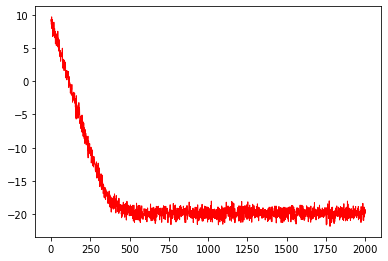

In [273]:
sq_error_mean = np.mean(error**2,axis=0)
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(10*np.log10(np.abs(sq_error_mean)), "r-", lw=1)

In [287]:
# part B: run 100 experiments and plot average error
# 2nd approach : I will make use of a single loop adopting 
#                by adopting a vectorized approach. Notice that it takes 
#                significantly less time (almost instantaneous)

N        = 2000        # training set samples
Num_iter = 100         # number of iterations
mu       = 0.01

noise = np.random.randn(Num_iter, N) * np.sqrt(0.01)
X     = np.random.randn(M, N, Num_iter)
Y     = np.dot(X.T, theta0) + noise
theta     = np.zeros((M, Num_iter))
error_tot = np.zeros((Num_iter, N))

for i in range(N):
    error = Y[:,i]-np.sum(X[:,i,:]*theta, axis=0)
    theta = theta + mu *X[:,i,:]*error
    error_tot[:,i] = error

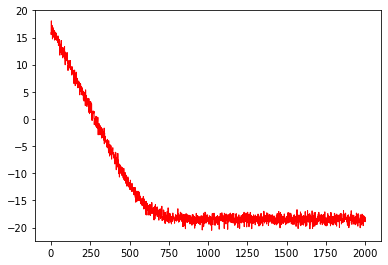

In [288]:
sq_error_mean = np.mean(error_tot**2,axis=0)
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(10*np.log10(np.abs(sq_error_mean)), "r-", lw=1)

### <span style="color: blue"> Problem - 2 </span> 
Repeat the experimental setup of the previus problem, with the difference that $\boldsymbol{\theta}_0 \in R^{60}$. For the LMS algorithm set $\mu=0.025$ and for the NLMS $\mu=0.35$ and $\delta=0.001$.  Run 200 independent experiments and plot the average error per iterations in dBs. Compare the performance of the algorithms. Plot in the same figure the error learning curves of the two algorithms and comment on the results.
### <span style="color: blue"> Solution </span> 


In [6]:
# define my constants
mu_lms     = 0.025
mu_nlms    = 0.35
delta_nlms = 0.001

M       = 30
N       = 500   # training set samples
NumIter = 200    # number of iterations


# original parameter vector
theta0     = np.random.randn(M)

I will follow the simple approach of the two loops becaue the RLS algorithm cannot be implemented in vectorial form ( at least I have not found a solution yet)

In [7]:
error_hist_lms  = np.zeros((NumIter, N))
error_hist_nlms = np.zeros((NumIter, N))



for iter in range(NumIter):
    
    # generation of the training set
    noise = np.random.randn(N)*np.sqrt(0.001)
    X     = np.random.randn(M, N) 
    Y     = np.dot(X.T, theta0) + noise
    
    theta_lms  = np.zeros(M)
    theta_nlms = np.zeros(M)

    
    for i in range(N):
        
        # --- lms algorithm --- #
        error_lms = Y[i] - np.dot(theta_lms.T, X[:, i])
        theta_lms = theta_lms + mu_lms*error_lms*X[:, i] 
        error_hist_lms[iter, i] = error_lms
        
        # --- nlms algorithm --- #
        error_nlms = Y[i] - np.dot(theta_nlms.T, X[:, i])
        lr_nlms    = mu_nlms/(delta_nlms+np.dot(X[:,i].T, X[:, i]))
        theta_nlms = theta_nlms + lr_nlms*X[:, i]*error_nlms
        error_hist_nlms[iter, i] = error_nlms


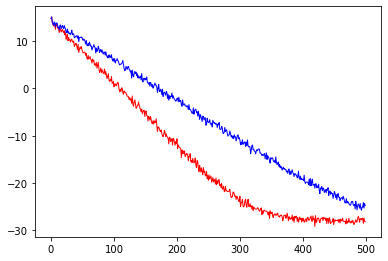

In [8]:
sq_error_mean_lms  = np.mean(error_hist_lms**2,axis=0)
sq_error_mean_nlms = np.mean(error_hist_nlms**2,axis=0)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(10*np.log10(np.abs(sq_error_mean_lms)), "r-", lw=1)
axes.plot(10*np.log10(np.abs(sq_error_mean_nlms)), "b-", lw=1)

### <span style="color: blue"> Exercise - 3 </span> 

Consider the system that is described by the following model:
$$
    y=\begin{bmatrix} 2.0 & 1.0 & 0.5 \end{bmatrix}  \begin{bmatrix} 1 \\ x \\ x^2 \end{bmatrix} + \eta
$$

where $\eta$ is a Gaussian random variable of zero mean and variance $\sigma^2 = 0.5$ and the random variables $x$ is uniformly distributed over the interval $[-3,3)$. 

1. Generate a training set of $N=100$ points for $\eta, x$ and calculate the corresponding y values according to the above equation. Make a plot of the generated training set along with the original nonlinear equation (i.e. $2 + x+ 0.5x^2$) 

2. Make use of the training and apply Kernel Ridge regression using Gaussian kernel. Create plots for different values of the regularization parameter 

3. Introduce randomly outliers of fixed deviation and repeat the regression step

### Solution

In [9]:
# data set generation
N = 100
theta = np.array([[2.0, 1.0, 0.5]]).T

np.random.seed(42)   # seed of the random generator

# generate the design matrix
X0 = np.ones((N,1))
X1 = 6*np.random.rand(N,1)-3
X2 = X1**2

X = np.hstack((X0, X1, X2))

sigma = np.sqrt(0.5) 
eta = sigma * np.random.randn(N,1)

# output matrix
Y = np.dot(X,theta) + eta

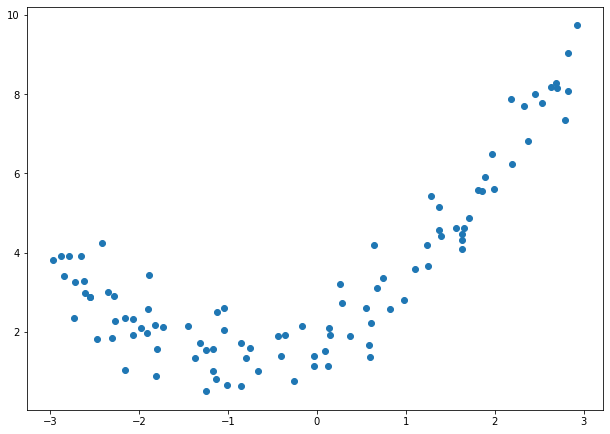

In [10]:
Xtrain = X1
Y_train = Y

fig = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(Xtrain, Y_train, label = "training set")

In [11]:
from scipy.spatial.distance import pdist, cdist, squareform

def Kernel_Ridge(Xtrain, Ytrain, Xtest, sigma, lamda):
    ' use of a kernel based solution to calculate the output Y_out'
    
    # Design matrix K
    pairwise_sq_dists = squareform(pdist(Xtrain, 'sqeuclidean'))
    K  = np.exp(-pairwise_sq_dists / sigma**2)     
    A  = K + lamda * np.identity(len(K))
    kx = np.exp(-cdist(Xtrain, Xtest,'sqeuclidean')/sigma**2)
    A  = np.linalg.inv(K + lamda * np.identity(len(K)))
    B  = np.matmul(kx.T,A)
    Y_out = np.matmul(B,Ytrain)
    
    return Y_out

In [12]:
# ridge regression
Xtest = np.linspace(-3, 3, 500).reshape(500,1)
Y_test = Kernel_Ridge(Xtrain = Xtrain, Ytrain = Y_train, Xtest = Xtest, sigma= 1.9, lamda = 0.50)

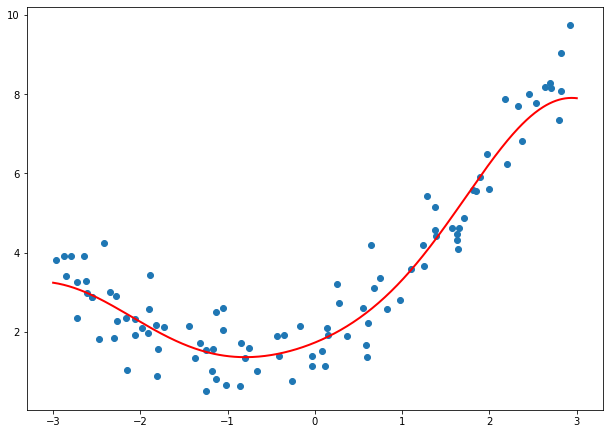

In [13]:
fig = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(Xtrain, Y_train, label = "training set")
axes.plot(Xtest, Y_test, "r-", linewidth = 2, label = 'test')

### <span style="color: blue"> Exercise - 4 </span> 

Consider a two-dimensional class problem that involves two classes, $\omega_1$ and $\omega_2$, which are modelled by Gaussian distributions with means $\boldsymbol{\mu}_1 = [0, 2]^T$ and $\boldsymbol{\mu}_2 = [0, 0]^T$ and covariance matrices $\Sigma_1 = \begin{bmatrix} 4 & 1.8 \\ 1.8 & 1 \end{bmatrix}$ and $\Sigma_2 = \begin{bmatrix} 4 & 1.2 \\ 1.2 & 1 \end{bmatrix}$, respectively.
   - Form and plot a data set $X$ consisting from 500 points from $\omega_1$ and another 500 points from $\omega_2$.
   - Assign each one of the points $X$ to either $\omega_1$ or $\omega_2$, according to the Bayes decision rule, and plot the points with different colors, depending on the class they are assigned to. Also compute the corresponding error classification probability.
   - Assign each one of the points of $X$ to either $\omega_1$ or $\omega_2$, according to the naives Bayes decision rule, and plot the points with different colors, depending on the class they are assigned to. Also compute the error classification probability, for the naive Bayes classifier.
   - Repeat steps (i)-(iv) for the case where $\Sigma_1 = \Sigma_2 = \begin{bmatrix} 4 & 0 \\ 0 & 1 \end{bmatrix}$ 
   - Comment on the results.
   
**Hint:** Use the fact that the marginal distributions of $P(\omega_1|\boldsymbol{x}), P(\omega_1|x_1)$, and $P(\omega_1|x_2)$ are also Gaussians with means 0 and 2 and variances 4 and 1, respectively. Similarly, the marginal distributions of $P(\omega_1|\boldsymbol{x}), P(\omega_1|x_1)$, and $P(\omega_1|x_2)$ are also Gaussians with means 0 and 0 and variances 4 and 1, respectively.

### Solution

In [27]:
# generate the data set

m1 = np.array([0, 2]).T
m2 = np.array([0, 0]).T

S1 = np.array([[4, 1.8], [1.8, 1]])
S2 = np.array([[4, 1.2], [1.2, 1]])

N1 = N2 = 500      # number of points per class

# data generation
X1 = np.random.multivariate_normal(m1, S1, N1)
X2 = np.random.multivariate_normal(m2, S2, N2)

X = np.concatenate((X1, X2), axis = 0)

L_class1 = np.zeros((N1, 1)) 
L_class2 = np.ones((N2, 1))

Labels = np.concatenate((L_class1, L_class2), axis = 0)

In [30]:
Labels.flatten().shape

(1000,)

In [16]:
import seaborn as sns

Text(0, 0.5, 'X2')

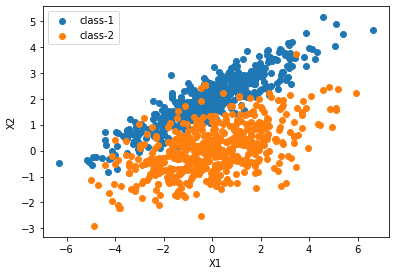

In [17]:
# plot of the dataset
colors = sns.color_palette()

fig = plt.figure()

# add axes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# plot onthat set of axes 
axes.scatter(X[np.argwhere(Labels == 0), 0] ,X[np.argwhere(Labels == 0), 1], color = colors[0], label = "class-1")
axes.scatter(X[np.argwhere(Labels == 1), 0] ,X[np.argwhere(Labels == 1), 1], color = colors[1], label = "class-2")
axes.legend(loc = 0)
axes.set_xlabel("X1")
axes.set_ylabel("X2")

In [18]:
# define class conditionals
def multivariate_normal_pdf(x, mean, sigma):
    l = x.shape[1]
    det_S      = np.linalg.det(sigma)
    norm_const = 1.0/((2.0*np.pi)**(l/2.0)*np.sqrt(det_S))
    inv_S      = np.linalg.inv(sigma)
    a1         = np.sum(np.dot(x-mean, inv_S)*(x-mean), axis = 1)
    
    return norm_const * np.exp(-0.5*a1)

In [19]:
# perform the classification using the Bayesian rule
P1 = N1/(N1+N2)
P2 = N2/(N1+N2)

p1 = multivariate_normal_pdf(X, m1, S1)
p2 = multivariate_normal_pdf(X, m2, S2)

Estimated_labels = (P1*p1 < P2*p2).astype(int)

CorrectlyClassified = np.sum((Estimated_labels == Labels.flatten()).astype(int))
WronglyClassified = (N1+N2)-CorrectlyClassified

MisClass_Rate = WronglyClassified/(N1+N2)
MisClass_Rate

0.06

Text(0, 0.5, 'X2')

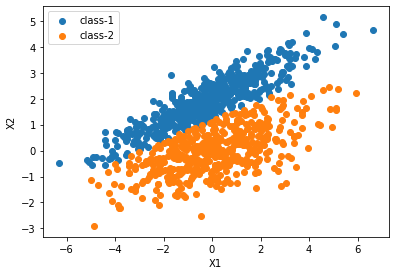

In [20]:
# plot of the points 
colors = sns.color_palette()

fig = plt.figure()

# add axes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# plot onthat set of axes 
axes.scatter(X[np.argwhere(Estimated_labels == 0), 0] ,X[np.argwhere(Estimated_labels == 0), 1], color = colors[0], label = "class-1")
axes.scatter(X[np.argwhere(Estimated_labels == 1), 0] ,X[np.argwhere(Estimated_labels == 1), 1], color = colors[1], label = "class-2")
axes.legend(loc = 0)
axes.set_xlabel("X1")
axes.set_ylabel("X2")

In [21]:
# define the naive bayes class conditional
def naiveBayes_pdf(x, mean, Cov):
    l = x.shape[1]
    sigma = np.diag(np.diag(Cov))
    det_S      = np.linalg.det(sigma)
    norm_const = 1.0/((2.0*np.pi)**(l/2.0)*np.sqrt(det_S))
    inv_S      = np.linalg.inv(sigma)
    a1         = np.sum(np.dot(x-mean, inv_S)*(x-mean), axis = 1)
    
    return norm_const * np.exp(-0.5*a1)
    

In [22]:
# perform the classification using the naive Bayesian rule
P1 = N1/(N1+N2)
P2 = N2/(N1+N2)

p1 = naiveBayes_pdf(X, m1, S1)
p2 = naiveBayes_pdf(X, m2, S2)

Estimated_labels_naive = (P1*p1 < P2*p2).astype(int)

CorrectlyClassified_naive = np.sum((Estimated_labels_naive == Labels.flatten()).astype(int))
WronglyClassified_naive = (N1+N2)-CorrectlyClassified_naive

MisClass_Rate_naive = WronglyClassified_naive/(N1+N2)
MisClass_Rate_naive

0.177

Text(0, 0.5, 'X2')

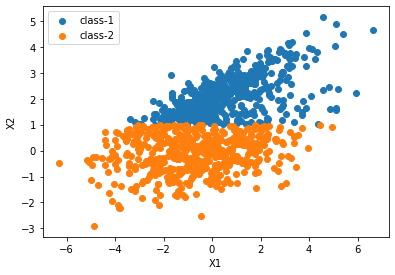

In [23]:
# naive case : plot the points
colors = sns.color_palette()

fig = plt.figure()

# add axes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# plot onthat set of axes 
axes.scatter(X[np.argwhere(Estimated_labels_naive == 0), 0] ,X[np.argwhere(Estimated_labels_naive == 0), 1], color = colors[0], label = "class-1")
axes.scatter(X[np.argwhere(Estimated_labels_naive == 1), 0] ,X[np.argwhere(Estimated_labels_naive == 1), 1], color = colors[1], label = "class-2")
axes.legend(loc = 0)
axes.set_xlabel("X1")
axes.set_ylabel("X2")

Text(0, 0.5, 'X2')

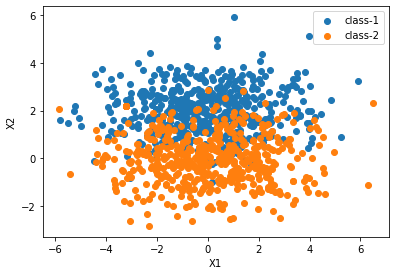

In [24]:
# I repeat for the case of S1=S2 = np.array([[4, 0], [0, 1]])

m1 = np.array([0, 2]).T
m2 = np.array([0, 0]).T

S1 = S2 = np.array([[4, 0], [0, 1]])


N1 = N2 = 500      # number of points per class

# data generation
X1 = np.random.multivariate_normal(m1, S1, N1)
X2 = np.random.multivariate_normal(m2, S2, N2)

X = np.concatenate((X1, X2), axis = 0)

L_class1 = np.zeros((N1, 1)) 
L_class2 = np.ones((N2, 1))

Labels = np.concatenate((L_class1, L_class2), axis = 0)

# plot of the dataset
colors = sns.color_palette()

fig = plt.figure()

# add axes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# plot onthat set of axes 
axes.scatter(X[np.argwhere(Labels == 0), 0] ,X[np.argwhere(Labels == 0), 1], color = colors[0], label = "class-1")
axes.scatter(X[np.argwhere(Labels == 1), 0] ,X[np.argwhere(Labels == 1), 1], color = colors[1], label = "class-2")
axes.legend(loc = 0)
axes.set_xlabel("X1")
axes.set_ylabel("X2")

MisClass_Rate: 0.157


Text(0, 0.5, 'X2')

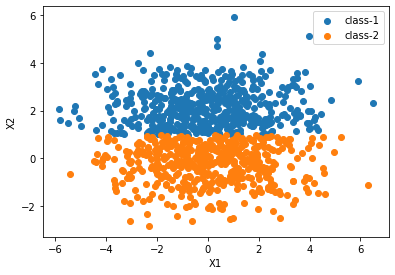

In [25]:

# perform the classification using the Bayesian rule
P1 = N1/(N1+N2)
P2 = N2/(N1+N2)

p1 = multivariate_normal_pdf(X, m1, S1)
p2 = multivariate_normal_pdf(X, m2, S2)

Estimated_labels = (P1*p1 < P2*p2).astype(int)

CorrectlyClassified = np.sum((Estimated_labels == Labels.flatten()).astype(int))
WronglyClassified = (N1+N2)-CorrectlyClassified

MisClass_Rate = WronglyClassified/(N1+N2)
print("MisClass_Rate:",MisClass_Rate)

# plot of the points with different colors depending on the class they are assigned to 
colors = sns.color_palette()

fig = plt.figure()

# add axes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# plot onthat set of axes 
axes.scatter(X[np.argwhere(Estimated_labels == 0), 0] ,X[np.argwhere(Estimated_labels == 0), 1], color = colors[0], label = "class-1")
axes.scatter(X[np.argwhere(Estimated_labels == 1), 0] ,X[np.argwhere(Estimated_labels == 1), 1], color = colors[1], label = "class-2")
axes.legend(loc = 0)
axes.set_xlabel("X1")
axes.set_ylabel("X2")

MisClass_Rate_naive: 0.157


Text(0, 0.5, 'X2')

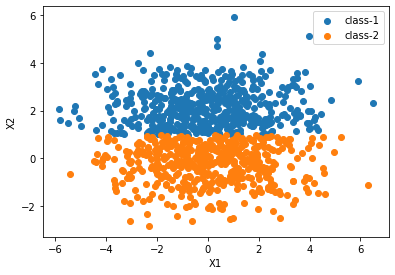

In [26]:
# perform the classification using the naive Bayesian rule
P1 = N1/(N1+N2)
P2 = N2/(N1+N2)

p1 = naiveBayes_pdf(X, m1, S1)
p2 = naiveBayes_pdf(X, m2, S2)

Estimated_labels_naive = (P1*p1 < P2*p2).astype(int)

CorrectlyClassified_naive = np.sum((Estimated_labels_naive == Labels.flatten()).astype(int))
WronglyClassified_naive = (N1+N2)-CorrectlyClassified_naive

MisClass_Rate_naive = WronglyClassified_naive/(N1+N2)
print("MisClass_Rate_naive:",MisClass_Rate_naive)

fig = plt.figure()

# add axes
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# plot onthat set of axes 
axes.scatter(X[np.argwhere(Estimated_labels_naive == 0), 0] ,X[np.argwhere(Estimated_labels_naive == 0), 1], color = colors[0], label = "class-1")
axes.scatter(X[np.argwhere(Estimated_labels_naive == 1), 0] ,X[np.argwhere(Estimated_labels_naive == 1), 1], color = colors[1], label = "class-2")
axes.legend(loc = 0)
axes.set_xlabel("X1")
axes.set_ylabel("X2")